<a href="https://colab.research.google.com/github/Saurabhrai08/Python/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile

data_path = '/content/skin_cancer_detect.zip'

with ZipFile(data_path,'r') as zip:
  zip.extractall()
  print('The data set has been extracted.')


The data set has been extracted.


In [ ]:
# Set image size and paths
IMG_SIZE = 256
BATCH_SIZE = 32
DATASET_PATH = '/content/skin_cancer_detect'

# Simple image loader without augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% validation split
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 2638 images belonging to 2 classes.
Found 659 images belonging to 2 classes.


In [ ]:
# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes : benign, malignant
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.6377 - loss: 0.6911 - val_accuracy: 0.7496 - val_loss: 0.4915
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7743 - loss: 0.4663 - val_accuracy: 0.8134 - val_loss: 0.3606
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.7853 - loss: 0.4436 - val_accuracy: 0.7299 - val_loss: 0.4908
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.7505 - loss: 0.4765 - val_accuracy: 0.8118 - val_loss: 0.3612
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.8078 - loss: 0.3944 - val_accuracy: 0.8042 - val_loss: 0.3602
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.8071 - loss: 0.3715 - val_accuracy: 0.7785 - val_loss: 0.4204
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.8052 - loss: 0.3936 - val_accuracy: 0.8407 - val_loss: 0.3540
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.8391 - loss: 0.3270 - val_accuracy: 0.8483 - val_loss: 

In [ ]:
# Save the model
model.save("a1_model.h5")

In [ ]:
from google.colab import files
files.download('a1_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Predict on validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)  # predicted labels

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [ ]:
y_true = val_generator.classes  # true labels
class_labels = list(val_generator.class_indices.keys())  # e.g., ['benign', 'malignant']

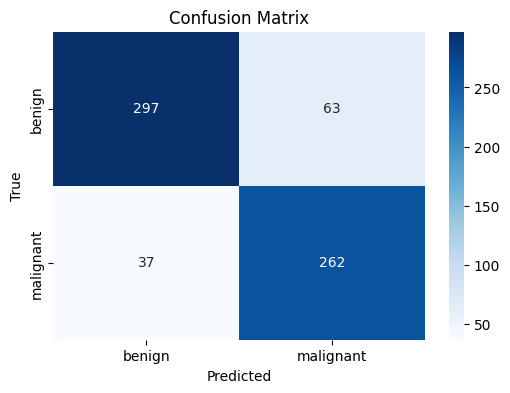

Classification Report:
               precision    recall  f1-score   support

      benign       0.89      0.82      0.86       360
   malignant       0.81      0.88      0.84       299

    accuracy                           0.85       659
   macro avg       0.85      0.85      0.85       659
weighted avg       0.85      0.85      0.85       659



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report (includes precision, recall, F1-score)
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

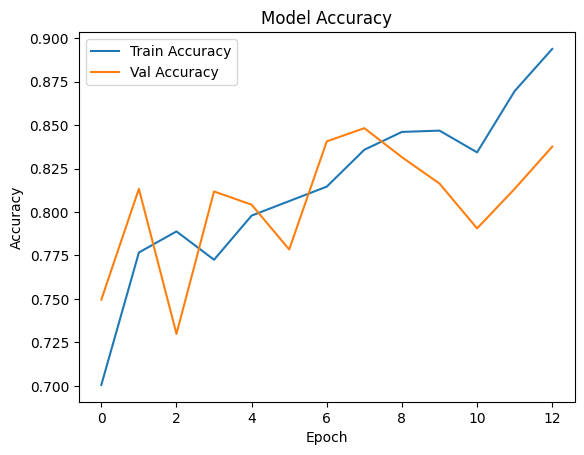

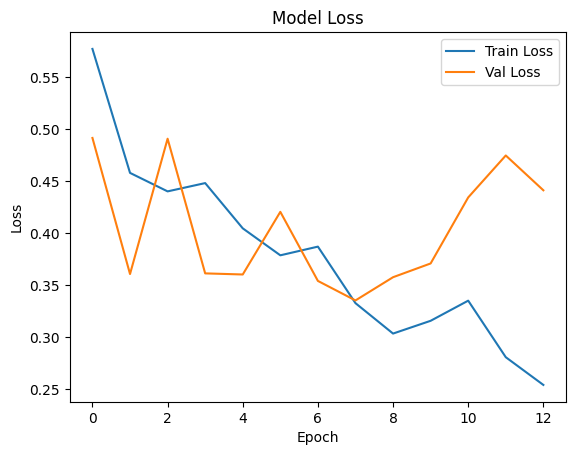

In [ ]:
# Plot accuracy & loss

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import cv2
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("a1_model.h5")

# Define correct class order based on your training
classes = ['benign', 'malignant']

# Test image path
image_path = "/content/0116.jpg"  # CHANGE THIS for each test

# Preprocess the image
IMG_SIZE = 256
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0  # Only if you used rescale=1./255 during training
img = np.expand_dims(img, axis=0)

# Predict
predictions = model.predict(img)
print("Raw prediction scores:", predictions)
print("Predicted class:", classes[np.argmax(predictions)])